In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import tensorflow as tf

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#turning the player data csv into pandas dataframe

df = pd.read_csv("player_stats.csv")
players=df['Player']
df1 = pd.read_csv("shootingstats.csv")
df1.reset_index(inplace=True)
df2 = pd.read_csv("advancedplayerstats.csv")
df2.reset_index(inplace=True)

df3 = pd.read_csv("playerpbpstats.csv")
df3.reset_index(inplace=True)


# df4 = df4.drop(labels = 'Rk',axis = 1)
df5 = pd.read_csv("adjustedshooting.csv")
df5.reset_index(inplace=True)

# df1.set_index(players,inplace=True)
# df.set_index(players,inplace=True,drop=True)

# df = df.join(df1,lsuffix='l',rsuffix='r')
# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)
# df = pd.merge(df,df2,on='Player')

# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)
# df = pd.merge(df,df3)
# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)

# df = pd.merge(df,df5)
# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)

# df = pd.merge(df,df4)
# df.set_index(players,inplace=True,drop=True)
# df.drop('Player',axis=1)
# df
# print(df.columns)
df = pd.concat([df,df1,df2,df3,df5],axis=1,join='inner')


# df = df[list(set(df.columns))]
# df.drop('Player',axis=1)

# df = pd.concat([df,df3],axis=1,join='inner')
# df = df[df.columns.unique()]

# df = pd.concat([df,df4],axis=1,join='inner')
# df = df[list(set(df.columns))]

# df = pd.concat([df,df5],axis=1,join='inner')
# df = df[list(set(df.columns))]


# df = df.dropna(axis=1)
# print(df.columns)
df.loc[:,~df.T.duplicated(keep='first')]
# cols=pd.Series(df.columns)
# for dup in df.columns[df.columns.duplicated(keep=False)]: 
#     cols[df.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
#                                      if d_idx != 0 
#                                      else dup 
#                                      for d_idx in range(df.columns.get_loc(dup).sum())]
#                                     )
# df.columns=cols

df.fillna(0,inplace=True)
yyyy = df[['ORtg', 'DRtg']]
df.drop('Rk',inplace=True,axis=1)
df.drop('Age',inplace=True,axis=1)
df.drop('Tm',inplace=True,axis=1)
df.drop('index',inplace=True,axis=1)
df.drop(['ORtg', 'DRtg'],inplace=True,axis=1)

df.Player
df.to_csv('df')

In [2]:
# playernames = df['Player']
# df = df[df['GS'] > 25]




In [3]:
positions = []
for i in df['Pos']:
    pos = 1 if i[:2] == 'PG' else 2 if i[:2] == 'SG' else 3 if  i[:2]== 'SF' else 4 if  i[:2]== 'PF' else 5
    print(pos)
    positions.append(pos)
df2 = df
players=df['Player']
df.drop('Player',axis=1,inplace=True)
print(positions)
df['Pos'] = positions

5
4
5
5
2
2
5
1
4
2
3
5
4
4
3
4
3
1
3
3
3
1
5
2
5
1
5
1
4
2
3
4
4
3
3
5
3
3
3
4
2
2
2
2
2
5
5
5
2
4
5
4
4
1
5
5
5
4
1
2
3
4
5
5
5
5
1
3
2
5
3
1
2
5
4
3
4
3
3
3
3
1
2
1
2
2
5
3
3
1
5
2
1
1
1
3
3
2
3
3
5
5
5
5
2
4
5
3
3
5
1
4
5
2
1
5
5
5
5
4
1
4
1
1
1
4
3
4
3
4
2
2
2
5
2
2
2
4
4
1
2
1
4
4
3
4
4
5
2
2
3
3
2
3
3
4
2
2
1
2
2
2
4
5
2
5
5
5
1
3
5
3
5
5
5
1
2
1
3
2
4
2
1
5
5
5
4
1
2
5
2
5
3
3
2
5
2
2
2
2
2
2
5
5
5
3
5
1
4
2
3
1
2
2
1
1
4
4
4
5
4
2
2
5
4
3
5
5
2
5
1
4
3
1
3
3
3
4
2
1
2
4
4
2
4
4
5
4
2
2
4
1
5
4
5
2
2
2
4
4
3
1
5
2
3
4
2
3
5
5
5
3
5
5
5
5
4
4
4
5
2
4
4
2
1
4
4
4
4
1
2
3
4
5
3
5
2
3
5
4
2
3
3
5
3
4
4
4
1
4
3
1
5
3
4
2
1
2
3
1
4
2
2
4
3
4
4
4
5
3
4
1
1
2
5
5
3
1
5
1
5
5
5
2
2
4
4
4
3
4
2
2
1
3
2
2
5
3
4
4
5
2
2
2
4
3
4
2
2
2
5
5
5
3
5
2
1
4
5
5
5
4
1
3
4
1
2
1
5
5
3
5
4
3
3
1
3
1
2
2
4
3
2
1
3
4
5
2
3
1
3
2
2
2
2
5
1
5
3
5
3
3
1
4
2
2
2
3
2
2
2
1
4
3
3
4
4
4
4
1
4
1
3
1
1
3
5
3
3
4
1
1
1
1
2
4
5
5
2
2
2
2
1
1
5
3
3
5
4
5
1
2
4
2
5
3
3
3
4
1
4
4
4
4
4
5
4
5
1
2
1
3
5
2
5
5
5
1
2
3


In [4]:
df = df.dropna()
# playernames = df['Player']
# df = df[["Pos", 'FG', 'FGA','3P','3PA','FT%', 'ORB', 'DRB', 'TRB','AST','STL','BLK','TOV','PF','PTS']]
# df2= df[["Pos", 'FG', 'FGA','3P','3PA','FT%', 'ORB', 'DRB', 'TRB','AST','STL','BLK','TOV','PF','PTS']]
# # kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
# df["Pos"].unique()
df.to_csv('df')
df.columns

Index(['Pos', 'G', 'GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS', 'Dist.', '2P', '0-3', '3-10', '10-16', '16-3P', '3P',
       '2P.1', '0-3.1', '3-10.1', '10-16.1', '16-3P.1', '3P.1', '2P.2', '3P.2',
       '%FGA', '#', '%3PA', '3P%', 'Att.', '#.1', 'Dist.', '2P', '0-3', '3-10',
       '10-16', '16-3P', '3P', '2P.1', '0-3.1', '3-10.1', '10-16.1', '16-3P.1',
       '3P.1', '2P.2', '3P.2', '%FGA', '#', '%3PA', '3P%', 'Att.', '#.1',
       'OnCourt', 'On-Off', 'BadPass', 'LostBall', 'Shoot', 'Off.', 'Shoot.1',
       'Off..1', 'PGA', 'And1', 'Blkd', 'FG', '2P', '3P', 'eFG', 'FT', 'TS',
       'FTr', '3PAr', 'FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+',
       '3PAr+', 'FG Add', 'TS Add'],
      dtype='object')

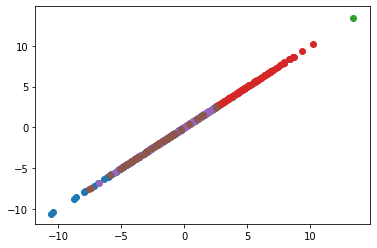

In [5]:
 
#Load Data

pca = PCA(0.9)
 
#Transform the data
scaler = StandardScaler()
matrix = scaler.fit_transform(df)
df = pd.DataFrame(pca.fit_transform(matrix))
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
df['label'] = label
#Getting unique labels
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[df["label"] == i].iloc[:,0],df[df["label"] == i].iloc[:,0])
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

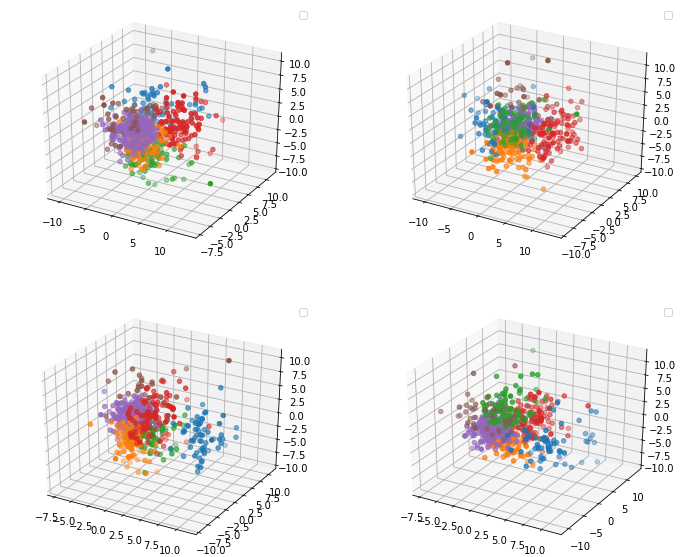

In [6]:
fig,ax= plt.subplots(2,2,subplot_kw = dict(projection='3d'),figsize=(12,10))
 #Axes3D(fig)

#===============
#  First subplot
#===============
# set up the axes for the first plot

#plotting the results:
choices = [(0,1,2),(0,2,3),(1,3,2),(1,0,3)]
#            ( df[label ==i , 3],df[label ==i, 1],df[label ==i , 2]),
#           ( df[label ==i, 0],df[label ==i , 3],df[label ==i , 2]),
#            ( df[label ==i, 0],df[label ==i, 3],df[label ==i, 2])]
index = 0
axescoords =[(0,0),(0,1),(1,0),(1,1)]
labelnames = ['t','v','w','x','y','z']
for a,b,c in choices:
    for i in u_labels:
        ax[axescoords[index]].scatter( df[df['label'] ==i].iloc[:,a]
            ,df[df['label'] ==i].iloc[:,b]
            ,df[df['label'] ==i].iloc[:,c])
        ax[axescoords[index]].legend()
    index += 1

plt.show()            

In [7]:
coef_names = ['Pos', 'G', 'GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS', 'Dist.', '2P', '0-3', '3-10', '10-16',
       '16-3P', '3P', '2P.1', '0-3.1', '3-10.1', '10-16.1', '16-3P.1', '3P.1',
       '2P.2', '3P.2', '%FGA', '#', '%3PA', '3P%', 'Att.', '#.1', 'Dist.',
       '2P', '0-3', '3-10', '10-16', '16-3P', '3P', '2P.1', '0-3.1', '3-10.1',
       '10-16.1', '16-3P.1', '3P.1', '2P.2', '3P.2', '%FGA', '#', '%3PA',
       '3P%', 'Att.', '#.1', 'OnCourt', 'On-Off', 'BadPass', 'LostBall',
       'Shoot', 'Off.', 'Shoot.1', 'Off..1', 'PGA', 'And1', 'Blkd', 'FG', '2P',
       '3P', 'eFG', 'FT', 'TS', 'FTr', '3PAr', 'FG+', '2P+', '3P+', 'eFG+',
       'FT+', 'TS+', 'FTr+', '3PAr+', 'FG Add', 'TS Add']

for i in kmeans.cluster_centers_:
    results = scaler.inverse_transform(pca.inverse_transform(i))
    print('\n------------------')
    print(i)
    print('\n------------------')
    for j in list(zip(coef_names,results)):
        print(j)
    print('---------------\n')


------------------
[-3.62094519e+00  7.55967360e+00 -2.40843821e-01  6.38116097e-01
 -2.96223544e-01 -7.05148164e-01  6.62994420e-01  3.06279709e-03
 -3.87512874e-01  3.43001210e-02 -4.22800911e-01  1.35177841e-01
  2.62523483e-01  9.32669315e-02 -2.35457180e-01  2.21773404e-01
  2.37026077e-01 -5.53611405e-02 -1.40896578e-01 -8.38043430e-03
  8.98887941e-02 -5.88189933e-03  2.23575414e-02  1.02631782e-02
 -6.61946641e-02 -6.55433632e-02 -2.00804833e-01  3.71189911e-02
  6.80680616e-02 -1.01911145e-01  1.00676622e-01 -1.01378212e-01
  5.74913047e-02 -2.22339555e-02  3.03764292e-02  7.53623162e-03
  7.13612075e-02]

------------------
('Pos', 2.949376241134352)
('G', 37.494400555997935)
('GS', 16.039392204402706)
('FG', 7.523556426460981)
('FGA', 16.706040448258825)
('FG%', 0.447666393659756)
('3P', 2.2928105827928302)
('3PA', 6.689867744333219)
('3P%', 0.3135840886005175)
('2P', 5.229159915944044)
('2PA', 10.02989620247832)
('2P%', 0.5058491912417494)
('FT', 3.327170933499198)
('FTA',

In [8]:
pcavec1 = list(pca.components_[0])
pcavec2 = list(pca.components_[1])
pcavec3 = list(pca.components_[2])
list(zip(coef_names,pcavec1))

[('Pos', 0.16245812893384434),
 ('G', 0.01592009628125035),
 ('GS', 0.029899184214939867),
 ('FG', 0.08330053811893817),
 ('FGA', -0.02271607923101257),
 ('FG%', 0.19106467816129363),
 ('3P', -0.17957963197049598),
 ('3PA', -0.2037577255986606),
 ('3P%', -0.10256308672153376),
 ('2P', 0.1840168624904569),
 ('2PA', 0.13750801773061194),
 ('2P%', 0.15979687843760584),
 ('FT', 0.040940895038464),
 ('FTA', 0.07865563391102874),
 ('FT%', -0.02475330929897399),
 ('ORB', 0.18774491831601198),
 ('DRB', 0.1495557470924775),
 ('TRB', 0.19201717929988976),
 ('AST', -0.05980829229493266),
 ('STL', -0.02257157526214392),
 ('BLK', 0.1485103566432289),
 ('TOV', 0.039933312329503076),
 ('PTS', 0.03856292528300232),
 ('Dist.', -0.24418501811693405),
 ('2P', 0.23414898461393197),
 ('0-3', 0.23370997485750683),
 ('3-10', 0.11215060581972218),
 ('10-16', -0.019213246231325202),
 ('16-3P', -0.07740575037633131),
 ('3P', -0.22943104431837802),
 ('2P.1', 0.15979687843760595),
 ('0-3.1', 0.11644741082348835),

In [9]:
list(zip(coef_names,pcavec2))

[('Pos', 0.061049128610917054),
 ('G', 0.004137083447258161),
 ('GS', 0.018770646357010493),
 ('FG', 0.08240333080222928),
 ('FGA', 0.03605482993411885),
 ('FG%', 0.08424523055235555),
 ('3P', -0.064464533159447),
 ('3PA', -0.08102463897343534),
 ('3P%', -0.04210516448372714),
 ('2P', 0.11915777582374154),
 ('2PA', 0.10572070418550972),
 ('2P%', 0.05784084744753444),
 ('FT', 0.06199809398033099),
 ('FTA', 0.07979371392279627),
 ('FT%', 0.0016076877438978645),
 ('ORB', 0.08687595815306404),
 ('DRB', 0.0795899181384565),
 ('TRB', 0.09597875229270976),
 ('AST', 0.025665285944641326),
 ('STL', 0.03559443690343119),
 ('BLK', 0.0696519587949665),
 ('TOV', 0.05206493605247821),
 ('PTS', 0.06814845532040462),
 ('Dist.', -0.1156904696541535),
 ('2P', 0.11338315293908696),
 ('0-3', 0.09915758417800886),
 ('3-10', 0.059529455352040316),
 ('10-16', 0.01612053522491801),
 ('16-3P', -0.027812319840736986),
 ('3P', -0.11685849030467901),
 ('2P.1', 0.05784084744753443),
 ('0-3.1', 0.027632315249065433

In [10]:
list(zip(coef_names,pcavec3))

[('Pos', 0.08400774561886143),
 ('G', -0.13237632541947186),
 ('GS', -0.12579241967023796),
 ('FG', -0.17870172646733806),
 ('FGA', -0.18170836486955366),
 ('FG%', -0.0430827003349456),
 ('3P', -0.15402615132953146),
 ('3PA', -0.1222443136046873),
 ('3P%', -0.15051544127721803),
 ('2P', -0.09528056014135812),
 ('2PA', -0.10710746452460936),
 ('2P%', -0.03375905781826506),
 ('FT', -0.1142852384361714),
 ('FTA', -0.09824804853568335),
 ('FT%', -0.12129052555102149),
 ('ORB', 0.04990992501151285),
 ('DRB', 0.04689556063312349),
 ('TRB', 0.056104757405170215),
 ('AST', -0.11126107798638589),
 ('STL', 0.04027744182623254),
 ('BLK', 0.0326569451479328),
 ('TOV', -0.03562957177580774),
 ('PTS', -0.20222208051368823),
 ('Dist.', -0.07366637568043244),
 ('2P', 0.02426140987944114),
 ('0-3', 0.07749845087304398),
 ('3-10', 0.0026523192815494233),
 ('10-16', -0.11836311696590816),
 ('16-3P', -0.04414924697173666),
 ('3P', -0.0400545585361254),
 ('2P.1', -0.03375905781826503),
 ('0-3.1', -0.060789

In [11]:
df2['predicted'] = label

In [12]:
df2

,Pos,G,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,Dist.,2P,0-3,3-10,10-16,16-3P,3P,2P.1,0-3.1,3-10.1,10-16.1,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,OnCourt,On-Off,BadPass,LostBall,Shoot,Off.,Shoot.1,Off..1,PGA,And1,Blkd,FG,2P,3P,eFG,FT,TS,FTr,3PAr,FG+,2P+,3P+,eFG+,FT+,TS+,FTr+,3PAr+,FG Add,TS Add,predicted
0,5,63,63,8.2,13.8,0.592,0.0,0.1,0.333,8.2,13.7,0.594,3.4,5.8,0.582,6.0,10.9,16.9,4.2,1.5,1.9,2.7,19.8,4.4,0.994,0.513,0.397,0.082,0.002,0.006,0.594,0.743,0.416,0.513,1.000,0.333,0.670,1.000,0.176,78,0.333,0.000,1,1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592,0.594,0.333,0.593,0.582,0.604,0.420,0.006,129.0,113.0,93.0,112.0,75.0,107.0,162.0,2.0,61.4,44.2,3
1,4,72,72,8.9,16.0,0.557,0.0,0.3,0.143,8.8,15.7,0.564,5.3,7.7,0.691,3.6,11.3,14.8,7.4,1.7,1.9,4.1,23.1,5.8,0.982,0.481,0.301,0.144,0.056,0.018,0.564,0.726,0.445,0.404,0.227,0.143,0.715,0.500,0.219,157,0.571,0.125,1,0,4.4,0.994,0.513,0.397,0.082,0.002,0.006,0.594,0.743,0.416,0.513,1.000,0.333,0.670,1.000,0.176,78.0,0.333,0.000,1.0,1.0,4.5,5.3,33.0,27.0,62.0,20.0,87.0,5.0,336.0,17.0,32.0,0.557,0.564,0.143,0.558,0.691,0.598,0.483,0.018,121.0,108.0,40.0,106.0,89.0,106.0,186.0,5.0,46.5,63.9,3
2,5,53,53,10.7,21.6,0.493,1.7,4.3,0.389,9.0,17.3,0.519,4.3,5.2,0.827,2.8,7.9,10.7,3.5,1.0,2.4,2.0,27.3,13.7,0.802,0.202,0.129,0.227,0.245,0.198,0.519,0.719,0.471,0.461,0.433,0.389,0.567,0.951,0.044,31,0.185,0.379,1,0,5.8,0.982,0.481,0.301,0.144,0.056,0.018,0.564,0.726,0.445,0.404,0.227,0.143,0.715,0.500,0.219,157.0,0.571,0.125,1.0,0.0,4.9,6.1,94.0,53.0,99.0,32.0,174.0,7.0,928.0,42.0,60.0,0.493,0.519,0.389,0.532,0.827,0.571,0.241,0.198,107.0,99.0,109.0,101.0,107.0,101.0,93.0,52.0,4.3,10.4,2
3,5,2,0,3.8,7.5,0.500,0.0,0.0,0.000,3.8,7.5,0.500,0.0,0.0,0.000,7.5,3.8,11.3,0.0,0.0,0.0,3.8,7.5,1.5,1.000,1.000,0.000,0.000,0.000,0.000,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0.000,0.000,0,0,13.7,0.802,0.202,0.129,0.227,0.245,0.198,0.519,0.719,0.471,0.461,0.433,0.389,0.567,0.951,0.044,31.0,0.185,0.379,1.0,0.0,-3.8,-5.3,13.0,20.0,70.0,29.0,83.0,1.0,309.0,23.0,20.0,0.500,0.500,0.000,0.500,0.000,0.500,0.000,0.000,109.0,95.0,0.0,95.0,0.0,89.0,0.0,0.0,-0.1,-0.3,3
4,2,47,1,7.7,20.8,0.368,3.6,10.4,0.346,4.1,10.4,0.391,2.0,2.9,0.676,0.7,5.9,6.6,7.0,1.3,0.6,4.2,20.9,15.9,0.500,0.244,0.173,0.053,0.030,0.500,0.391,0.523,0.261,0.214,0.375,0.346,0.192,0.913,0.008,2,0.188,0.360,4,0,1.5,1.000,1.000,0.000,0.000,0.000,0.000,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.0,-12.9,-15.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.368,0.391,0.346,0.455,0.676,0.473,0.139,0.500,80.0,75.0,97.0,86.0,87.0,84.0,53.0,130.0,-39.3,-51.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,1,60,60,12.0,27.5,0.437,4.5,12.5,0.361,7.5,15.0,0.501,10.6,12.3,0.860,0.7,4.9,5.6,12.3,1.4,0.2,6.4,39.1,16.8,0.545,0.183,0.167,0.146,0.050,0.455,0.501,0.596,0.452,0.467,0.413,0.361,0.161,0.298,0.000,0,0.033,0.579,1,1,11.9,0.631,0.329,0.250,0.023,0.028,0.369,0.501,0.601,0.413,0.214,0.353,0.356,0.568,0.937,0.048,26.0,0.423,0.362,2.0,0.0,-6.2,-5.8,50.0,22.0,69.0,18.0,28.0,26.0,279.0,6.0,44.0,0.457,0.540,0.344,0.530,0.751,0.566,0.288,0.426,99.0,103.0,96.0,100.0,97.0,100.0,111.0,111.0,1.2,2.0,1
647,5,58,39,9.4,17.9,0.524,0.7,2.8,0.240,8.7,15.1,0.577,4.6,6.7,0.682,6.0,9.4,15.4,3.3,1.5,0.9,2.8,24.0,6.6,0.843,0.570,0.242,0.027,0.004,0.157,0.577,0.659,0.422,0.154,1.000,0.240,0.704,0.944,0.140,63,0.053,0.500,0,0,16.8,0

In [13]:
len(list(set(playernames)))

NameError: name 'playernames' is not defined

In [14]:
len(df)

651

In [15]:
x,y,z = 0,0,0
for i in label:
    
    if i == 2:
        x+=1
    if i == 1:
        y+=1
    if i == 0:
        z+=1
print(f'2{x} 1{y} 0{z}')

290 1112 067


In [16]:
df.to_numpy()

array([[ 5.23101469,  0.28465836,  3.3827367 , ...,  1.0067564 ,
         0.57037082,  3.        ],
       [ 7.90492372,  1.84612796, -2.50222662, ...,  0.513353  ,
        -0.14306015,  3.        ],
       [ 4.80278425,  0.18338717, -7.33739919, ..., -0.05249299,
        -0.62708624,  2.        ],
       ...,
       [ 8.40387194,  7.45294981,  0.40561113, ..., -2.91450263,
         4.33619516,  3.        ],
       [ 5.67738954,  1.40234167,  4.66038473, ..., -0.85149128,
        -1.84655535,  3.        ],
       [ 8.60042278,  1.05861641,  3.01037057, ..., -1.57072639,
         0.31280787,  3.        ]])

In [17]:
df[(df['0'])&(df["label"] == i)]

KeyError: '0'

In [18]:
yyyy

,ORtg,DRtg
0,122.0,106
1,116.0,106
2,115.0,112
3,96.0,116
4,93.0,113
...,...,...
646,114.0,117
647,116.0,111
648,95.0,116
649,116.0,113


In [19]:
x = df.to_numpy()
y = yyyy

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
regr = MLPRegressor(random_state=1, max_iter=10000,verbose = True).fit(X_train, y_train)
regr.predict(X_test)

Iteration 1, loss = 5992.36396660
Iteration 2, loss = 5963.65017112
Iteration 3, loss = 5935.67349241
Iteration 4, loss = 5907.82831568
Iteration 5, loss = 5879.97048793
Iteration 6, loss = 5852.07160291
Iteration 7, loss = 5824.09518220
Iteration 8, loss = 5795.76800441
Iteration 9, loss = 5767.30004598
Iteration 10, loss = 5738.62065344
Iteration 11, loss = 5709.74934743
Iteration 12, loss = 5680.05848447
Iteration 13, loss = 5650.17614685
Iteration 14, loss = 5620.03205313
Iteration 15, loss = 5588.67859434
Iteration 16, loss = 5557.17302262
Iteration 17, loss = 5524.72409893
Iteration 18, loss = 5491.75035406
Iteration 19, loss = 5458.12786893
Iteration 20, loss = 5423.56919532
Iteration 21, loss = 5388.81524322
Iteration 22, loss = 5352.58944595
Iteration 23, loss = 5315.78818014
Iteration 24, loss = 5277.95706094
Iteration 25, loss = 5239.22579216
Iteration 26, loss = 5199.80160044
Iteration 27, loss = 5159.05238288
Iteration 28, loss = 5117.63190798
Iteration 29, loss = 5074.796

Iteration 288, loss = 96.43780479
Iteration 289, loss = 96.12140194
Iteration 290, loss = 95.76499077
Iteration 291, loss = 95.44816202
Iteration 292, loss = 95.11213596
Iteration 293, loss = 94.80217666
Iteration 294, loss = 94.46742975
Iteration 295, loss = 94.15215767
Iteration 296, loss = 93.84799195
Iteration 297, loss = 93.54572924
Iteration 298, loss = 93.23819590
Iteration 299, loss = 92.94524175
Iteration 300, loss = 92.62228177
Iteration 301, loss = 92.30612006
Iteration 302, loss = 92.00897008
Iteration 303, loss = 91.73097773
Iteration 304, loss = 91.42691259
Iteration 305, loss = 91.14144210
Iteration 306, loss = 90.84881505
Iteration 307, loss = 90.58653301
Iteration 308, loss = 90.30632447
Iteration 309, loss = 90.03274293
Iteration 310, loss = 89.75657351
Iteration 311, loss = 89.46521535
Iteration 312, loss = 89.21070169
Iteration 313, loss = 88.95320066
Iteration 314, loss = 88.66925654
Iteration 315, loss = 88.40635561
Iteration 316, loss = 88.14808808
Iteration 317,

Iteration 587, loss = 46.78711993
Iteration 588, loss = 46.70366469
Iteration 589, loss = 46.61212415
Iteration 590, loss = 46.51588125
Iteration 591, loss = 46.43741250
Iteration 592, loss = 46.35621360
Iteration 593, loss = 46.27669584
Iteration 594, loss = 46.18605018
Iteration 595, loss = 46.10089124
Iteration 596, loss = 46.00938600
Iteration 597, loss = 45.92525405
Iteration 598, loss = 45.83473900
Iteration 599, loss = 45.75436186
Iteration 600, loss = 45.66196622
Iteration 601, loss = 45.57463351
Iteration 602, loss = 45.49231314
Iteration 603, loss = 45.39079512
Iteration 604, loss = 45.31542589
Iteration 605, loss = 45.22424418
Iteration 606, loss = 45.13036848
Iteration 607, loss = 45.01731112
Iteration 608, loss = 44.94404722
Iteration 609, loss = 44.84917005
Iteration 610, loss = 44.77088043
Iteration 611, loss = 44.69248497
Iteration 612, loss = 44.60805662
Iteration 613, loss = 44.53134882
Iteration 614, loss = 44.44699035
Iteration 615, loss = 44.36706408
Iteration 616,

Iteration 878, loss = 27.42128175
Iteration 879, loss = 27.36413241
Iteration 880, loss = 27.31851236
Iteration 881, loss = 27.28136149
Iteration 882, loss = 27.23547567
Iteration 883, loss = 27.18271276
Iteration 884, loss = 27.12052749
Iteration 885, loss = 27.06568858
Iteration 886, loss = 27.01012364
Iteration 887, loss = 26.95961299
Iteration 888, loss = 26.90798756
Iteration 889, loss = 26.86203032
Iteration 890, loss = 26.82962992
Iteration 891, loss = 26.78632952
Iteration 892, loss = 26.73954681
Iteration 893, loss = 26.69533273
Iteration 894, loss = 26.63749342
Iteration 895, loss = 26.59159246
Iteration 896, loss = 26.54289906
Iteration 897, loss = 26.48388874
Iteration 898, loss = 26.43085315
Iteration 899, loss = 26.38212087
Iteration 900, loss = 26.33342581
Iteration 901, loss = 26.27949218
Iteration 902, loss = 26.24265329
Iteration 903, loss = 26.18336348
Iteration 904, loss = 26.12548466
Iteration 905, loss = 26.07652832
Iteration 906, loss = 26.03387349
Iteration 907,

Iteration 1178, loss = 14.25959031
Iteration 1179, loss = 14.22499746
Iteration 1180, loss = 14.18671584
Iteration 1181, loss = 14.15520478
Iteration 1182, loss = 14.11997765
Iteration 1183, loss = 14.06936911
Iteration 1184, loss = 14.02841927
Iteration 1185, loss = 14.00070011
Iteration 1186, loss = 13.95440845
Iteration 1187, loss = 13.92150616
Iteration 1188, loss = 13.88315410
Iteration 1189, loss = 13.85705438
Iteration 1190, loss = 13.82939931
Iteration 1191, loss = 13.79642404
Iteration 1192, loss = 13.77049134
Iteration 1193, loss = 13.73881722
Iteration 1194, loss = 13.70476897
Iteration 1195, loss = 13.67134443
Iteration 1196, loss = 13.64134008
Iteration 1197, loss = 13.60239711
Iteration 1198, loss = 13.56949302
Iteration 1199, loss = 13.53345211
Iteration 1200, loss = 13.50473300
Iteration 1201, loss = 13.47564826
Iteration 1202, loss = 13.44075253
Iteration 1203, loss = 13.41033787
Iteration 1204, loss = 13.35364977
Iteration 1205, loss = 13.30855513
Iteration 1206, loss

Iteration 1475, loss = 6.70905822
Iteration 1476, loss = 6.68400147
Iteration 1477, loss = 6.65780251
Iteration 1478, loss = 6.64120012
Iteration 1479, loss = 6.63298177
Iteration 1480, loss = 6.62660881
Iteration 1481, loss = 6.60819143
Iteration 1482, loss = 6.59406517
Iteration 1483, loss = 6.56720071
Iteration 1484, loss = 6.54607773
Iteration 1485, loss = 6.52600846
Iteration 1486, loss = 6.51186224
Iteration 1487, loss = 6.49265379
Iteration 1488, loss = 6.48042365
Iteration 1489, loss = 6.46555137
Iteration 1490, loss = 6.44869101
Iteration 1491, loss = 6.43275378
Iteration 1492, loss = 6.42276092
Iteration 1493, loss = 6.40792748
Iteration 1494, loss = 6.38791813
Iteration 1495, loss = 6.37356846
Iteration 1496, loss = 6.35533967
Iteration 1497, loss = 6.33783211
Iteration 1498, loss = 6.31972483
Iteration 1499, loss = 6.31056562
Iteration 1500, loss = 6.29649278
Iteration 1501, loss = 6.27868945
Iteration 1502, loss = 6.27041610
Iteration 1503, loss = 6.25665861
Iteration 1504

Iteration 1775, loss = 3.29716876
Iteration 1776, loss = 3.28446612
Iteration 1777, loss = 3.28054071
Iteration 1778, loss = 3.27692031
Iteration 1779, loss = 3.26392316
Iteration 1780, loss = 3.25268033
Iteration 1781, loss = 3.25029869
Iteration 1782, loss = 3.25005242
Iteration 1783, loss = 3.24027727
Iteration 1784, loss = 3.22684535
Iteration 1785, loss = 3.21858300
Iteration 1786, loss = 3.21858806
Iteration 1787, loss = 3.21606036
Iteration 1788, loss = 3.20172948
Iteration 1789, loss = 3.19277057
Iteration 1790, loss = 3.18018421
Iteration 1791, loss = 3.17065176
Iteration 1792, loss = 3.16661255
Iteration 1793, loss = 3.16168699
Iteration 1794, loss = 3.15419890
Iteration 1795, loss = 3.14486236
Iteration 1796, loss = 3.13231575
Iteration 1797, loss = 3.12916994
Iteration 1798, loss = 3.12629359
Iteration 1799, loss = 3.12515580
Iteration 1800, loss = 3.11668456
Iteration 1801, loss = 3.10358830
Iteration 1802, loss = 3.09597060
Iteration 1803, loss = 3.08701915
Iteration 1804

Iteration 2068, loss = 1.62654901
Iteration 2069, loss = 1.62375032
Iteration 2070, loss = 1.61465525
Iteration 2071, loss = 1.60816613
Iteration 2072, loss = 1.60538934
Iteration 2073, loss = 1.60098054
Iteration 2074, loss = 1.59639970
Iteration 2075, loss = 1.59332749
Iteration 2076, loss = 1.59055885
Iteration 2077, loss = 1.58591400
Iteration 2078, loss = 1.58141642
Iteration 2079, loss = 1.57698675
Iteration 2080, loss = 1.57373845
Iteration 2081, loss = 1.56918967
Iteration 2082, loss = 1.56537950
Iteration 2083, loss = 1.55899799
Iteration 2084, loss = 1.55521813
Iteration 2085, loss = 1.55202280
Iteration 2086, loss = 1.54719657
Iteration 2087, loss = 1.54494716
Iteration 2088, loss = 1.54148965
Iteration 2089, loss = 1.54036831
Iteration 2090, loss = 1.53860148
Iteration 2091, loss = 1.53391322
Iteration 2092, loss = 1.52746492
Iteration 2093, loss = 1.52238211
Iteration 2094, loss = 1.51908869
Iteration 2095, loss = 1.51559205
Iteration 2096, loss = 1.51199233
Iteration 2097

Iteration 2352, loss = 0.81939461
Iteration 2353, loss = 0.81554454
Iteration 2354, loss = 0.81206260
Iteration 2355, loss = 0.81296698
Iteration 2356, loss = 0.81124464
Iteration 2357, loss = 0.80941960
Iteration 2358, loss = 0.80494712
Iteration 2359, loss = 0.80313227
Iteration 2360, loss = 0.80376588
Iteration 2361, loss = 0.80467063
Iteration 2362, loss = 0.80202882
Iteration 2363, loss = 0.79738624
Iteration 2364, loss = 0.79451354
Iteration 2365, loss = 0.79426936
Iteration 2366, loss = 0.78855503
Iteration 2367, loss = 0.78864442
Iteration 2368, loss = 0.79353972
Iteration 2369, loss = 0.79196611
Iteration 2370, loss = 0.78383127
Iteration 2371, loss = 0.78087754
Iteration 2372, loss = 0.77940158
Iteration 2373, loss = 0.77690470
Iteration 2374, loss = 0.77694603
Iteration 2375, loss = 0.77455343
Iteration 2376, loss = 0.77105104
Iteration 2377, loss = 0.76704466
Iteration 2378, loss = 0.76777922
Iteration 2379, loss = 0.76577147
Iteration 2380, loss = 0.76139428
Iteration 2381

Iteration 2633, loss = 0.40933612
Iteration 2634, loss = 0.40817864
Iteration 2635, loss = 0.40685351
Iteration 2636, loss = 0.40559905
Iteration 2637, loss = 0.40398910
Iteration 2638, loss = 0.40361833
Iteration 2639, loss = 0.40196911
Iteration 2640, loss = 0.40040103
Iteration 2641, loss = 0.39954347
Iteration 2642, loss = 0.39890558
Iteration 2643, loss = 0.39866168
Iteration 2644, loss = 0.39821202
Iteration 2645, loss = 0.39682387
Iteration 2646, loss = 0.39494310
Iteration 2647, loss = 0.39328347
Iteration 2648, loss = 0.39256083
Iteration 2649, loss = 0.39196455
Iteration 2650, loss = 0.39070449
Iteration 2651, loss = 0.38972103
Iteration 2652, loss = 0.38739651
Iteration 2653, loss = 0.38761444
Iteration 2654, loss = 0.38680884
Iteration 2655, loss = 0.38517759
Iteration 2656, loss = 0.38434023
Iteration 2657, loss = 0.38493866
Iteration 2658, loss = 0.38264240
Iteration 2659, loss = 0.38270030
Iteration 2660, loss = 0.38241313
Iteration 2661, loss = 0.38049977
Iteration 2662

Iteration 2906, loss = 0.19983083
Iteration 2907, loss = 0.19988373
Iteration 2908, loss = 0.19832939
Iteration 2909, loss = 0.19705478
Iteration 2910, loss = 0.19717565
Iteration 2911, loss = 0.19575899
Iteration 2912, loss = 0.19497425
Iteration 2913, loss = 0.19576014
Iteration 2914, loss = 0.19651190
Iteration 2915, loss = 0.19519397
Iteration 2916, loss = 0.19350231
Iteration 2917, loss = 0.19345015
Iteration 2918, loss = 0.19172676
Iteration 2919, loss = 0.19336065
Iteration 2920, loss = 0.19311520
Iteration 2921, loss = 0.19014363
Iteration 2922, loss = 0.18971518
Iteration 2923, loss = 0.18954743
Iteration 2924, loss = 0.18842549
Iteration 2925, loss = 0.18773642
Iteration 2926, loss = 0.18703943
Iteration 2927, loss = 0.18690147
Iteration 2928, loss = 0.18633078
Iteration 2929, loss = 0.18583854
Iteration 2930, loss = 0.18525202
Iteration 2931, loss = 0.18420335
Iteration 2932, loss = 0.18352594
Iteration 2933, loss = 0.18448275
Iteration 2934, loss = 0.18371498
Iteration 2935

Iteration 3180, loss = 0.08276622
Iteration 3181, loss = 0.08237498
Iteration 3182, loss = 0.08287124
Iteration 3183, loss = 0.08227381
Iteration 3184, loss = 0.08213738
Iteration 3185, loss = 0.08109369
Iteration 3186, loss = 0.08107865
Iteration 3187, loss = 0.08035329
Iteration 3188, loss = 0.08254025
Iteration 3189, loss = 0.08345589
Iteration 3190, loss = 0.08086056
Iteration 3191, loss = 0.08072794
Iteration 3192, loss = 0.07996484
Iteration 3193, loss = 0.07909617
Iteration 3194, loss = 0.07887315
Iteration 3195, loss = 0.07843239
Iteration 3196, loss = 0.07865945
Iteration 3197, loss = 0.07845390
Iteration 3198, loss = 0.07755696
Iteration 3199, loss = 0.07833067
Iteration 3200, loss = 0.07797647
Iteration 3201, loss = 0.07695091
Iteration 3202, loss = 0.07630431
Iteration 3203, loss = 0.07582535
Iteration 3204, loss = 0.07563848
Iteration 3205, loss = 0.07645575
Iteration 3206, loss = 0.07575921
Iteration 3207, loss = 0.07490652
Iteration 3208, loss = 0.07479456
Iteration 3209

Iteration 3442, loss = 0.02938189
Iteration 3443, loss = 0.02960975
Iteration 3444, loss = 0.02940532
Iteration 3445, loss = 0.02971391
Iteration 3446, loss = 0.02930314
Iteration 3447, loss = 0.02928113
Iteration 3448, loss = 0.02933352
Iteration 3449, loss = 0.02867842
Iteration 3450, loss = 0.02834113
Iteration 3451, loss = 0.02877858
Iteration 3452, loss = 0.02869875
Iteration 3453, loss = 0.02844031
Iteration 3454, loss = 0.02862893
Iteration 3455, loss = 0.02775330
Iteration 3456, loss = 0.02800192
Iteration 3457, loss = 0.02789753
Iteration 3458, loss = 0.02784276
Iteration 3459, loss = 0.02752776
Iteration 3460, loss = 0.02747300
Iteration 3461, loss = 0.02743283
Iteration 3462, loss = 0.02731812
Iteration 3463, loss = 0.02707465
Iteration 3464, loss = 0.02693915
Iteration 3465, loss = 0.02725214
Iteration 3466, loss = 0.02685302
Iteration 3467, loss = 0.02673576
Iteration 3468, loss = 0.02660077
Iteration 3469, loss = 0.02631423
Iteration 3470, loss = 0.02623538
Iteration 3471

array([[ 65.35551425, 101.20760652],
       [117.62827264, 114.50635007],
       [100.31545481,  93.83046636],
       [116.40988244, 113.65467248],
       [121.27613659, 124.53458884],
       [124.84004328,  90.16907778],
       [102.25766556,  95.61406285],
       [109.79012853, 113.24921082],
       [120.00828356, 117.22612996],
       [119.14706762, 122.47866797],
       [107.48100688, 107.54239227],
       [ 87.34348863, 101.58837042],
       [108.28655642,  99.57382248],
       [109.45768568, 107.96295628],
       [ 97.40426238, 100.37848089],
       [108.1835729 , 102.71711093],
       [ 67.05250498,  94.55609214],
       [109.10627204, 116.8934352 ],
       [137.78868601, 122.13982358],
       [112.75629107, 111.22277581],
       [113.27741557, 113.26084674],
       [ 96.32329237, 132.66716253],
       [119.45339667, 105.75247438],
       [117.73958103, 132.7202728 ],
       [106.0501199 , 119.24224159],
       [120.90815317, 109.35127157],
       [ 52.76964622,  71.40356423],
 

In [21]:

ans = regr.predict(x)
for i,v in list(zip(players,ans)):
    print(f'{i} \n- Off - {v[0]} \n- Def - {v[1]}')


Steven Adams\adamsst01 
- Off - 122.00773613643173 
- Def - 105.96610384248687
Bam Adebayo\adebaba01 
- Off - 116.00118720347632 
- Def - 106.10585926942964
LaMarcus Aldridge\aldrila01 
- Off - 100.67494300450082 
- Def - 109.70110603252745
Kyle Alexander\alexaky01 
- Off - 96.00382417169774 
- Def - 116.01953382448835
Nickeil Alexander-Walker\alexani01 
- Off - 92.96200845526906 
- Def - 112.96347324150504
Grayson Allen\allengr01 
- Off - 113.82890426580109 
- Def - 115.18395188403072
Jarrett Allen\allenja01 
- Off - 130.88823925253064 
- Def - 108.22610392825315
Kadeem Allen\allenka01 
- Off - 94.7677691363461 
- Def - 114.23505051730416
Al-Farouq Aminu\aminual01 
- Off - 88.06878796492336 
- Def - 108.01806350825007
Justin Anderson\anderju01 
- Off - 81.64037375748246 
- Def - 109.66270884472624
Kyle Anderson\anderky01 
- Off - 112.75629107461991 
- Def - 111.22277581170917
Ryan Anderson\anderry01 
- Off - 93.02924345054785 
- Def - 114.64494506360504
Giannis Antetokounmpo\antetgi01

Amile Jefferson\jeffeam01 
- Off - 104.80798470842669 
- Def - 123.60826024053966
DaQuan Jeffries\jeffrda01 
- Off - 135.02177089290583 
- Def - 114.4854965697905
Ty Jerome\jeromty01 
- Off - 86.19968213106331 
- Def - 114.43503161401568
Alize Johnson\johnsal02 
- Off - 107.8535411062686 
- Def - 105.24840142010605
B.J. Johnson\johnsbj01 
- Off - 81.07214361674535 
- Def - 111.02086474533988
Cameron Johnson\johnsca02 
- Off - 117.04878929309442 
- Def - 112.84498567404931
James Johnson\johnsja01 
- Off - 109.42597174284957 
- Def - 120.7224589352841
James Johnson\johnsja01 
- Off - 120.00828356017868 
- Def - 117.22612995979287
James Johnson\johnsja01 
- Off - 109.00459189222573 
- Def - 107.97793651427646
Keldon Johnson\johnske04 
- Off - 119.40760050441494 
- Def - 109.14464849008039
Stanley Johnson\johnsst04 
- Off - 89.99917101375866 
- Def - 102.92900782409717
Tyler Johnson\johnsty01 
- Off - 105.12842182986563 
- Def - 113.84832572887696
Tyler Johnson\johnsty01 
- Off - 98.236513

In [22]:
x[~np.isnan(x)]

array([ 5.23101469,  0.28465836,  3.3827367 , ..., -1.57072639,
        0.31280787,  3.        ])

In [23]:
y.shape

(651, 2)

In [24]:
y.dropna()


,ORtg,DRtg
0,122.0,106
1,116.0,106
2,115.0,112
3,96.0,116
4,93.0,113
...,...,...
646,114.0,117
647,116.0,111
648,95.0,116
649,116.0,113


In [25]:
pca.transform()

TypeError: transform() missing 1 required positional argument: 'X'

In [ ]:
pca.inverse_transform()

In [26]:
x[256]

array([-3.36345055, -0.578497  , -0.46489192, -3.13661722,  1.86515063,
       -0.81792258, -0.82457266,  1.44213574,  0.99093981, -0.0189143 ,
        0.59107064,  0.13567095, -0.38529212, -0.84669154,  0.2586509 ,
        0.93894119, -0.99131226,  1.23464519,  2.68137903,  0.38686805,
        0.68521876, -0.24294762, -0.38254807, -0.78837375,  0.66199448,
       -0.32002314,  0.21480876, -0.79304175,  0.02330235, -0.70479781,
        1.74665572,  1.1622868 , -1.00577103,  1.34001807,  0.67458825,
       -1.33193282, -0.79566174,  4.        ])

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(250, activation='relu')
    ,tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(250, activation='relu')
    ,tf.keras.layers.Dropout(0.2)
    ,tf.keras.layers.Dense(50, activation='relu')
    ,tf.keras.layers.Dropout(0.2)
    ,tf.keras.layers.Dense(2)
])
model.compile(optimizer='adam',metrics=['accuracy'],loss='mse')
model.fit(X_train, y_train,validation_data =(X_test,y_test),epochs=150)

Epoch 1/150
14/14 [==============================] - 0s 9ms/step - loss: 11200.2080 - accuracy: 0.4771 - val_loss: 9738.9668 - val_accuracy: 0.4186
Epoch 2/150
14/14 [==============================] - 0s 3ms/step - loss: 7283.2773 - accuracy: 0.5161 - val_loss: 3923.2993 - val_accuracy: 0.6000
Epoch 3/150
14/14 [==============================] - 0s 3ms/step - loss: 1776.4097 - accuracy: 0.4954 - val_loss: 1035.0547 - val_accuracy: 0.6000
Epoch 4/150
14/14 [==============================] - 0s 4ms/step - loss: 1323.3901 - accuracy: 0.5161 - val_loss: 681.2307 - val_accuracy: 0.6512
Epoch 5/150
14/14 [==============================] - 0s 3ms/step - loss: 810.4244 - accuracy: 0.5688 - val_loss: 489.9064 - val_accuracy: 0.6000
Epoch 6/150
14/14 [==============================] - 0s 3ms/step - loss: 693.9198 - accuracy: 0.5642 - val_loss: 396.8094 - val_accuracy: 0.6605
Epoch 7/150
14/14 [==============================] - 0s 3ms/step - loss: 630.3912 - accuracy: 0.5344 - val_loss: 416.6074 

Epoch 57/150
14/14 [==============================] - 0s 3ms/step - loss: 328.3022 - accuracy: 0.6606 - val_loss: 277.8437 - val_accuracy: 0.7814
Epoch 58/150
14/14 [==============================] - 0s 3ms/step - loss: 285.8608 - accuracy: 0.7041 - val_loss: 281.4573 - val_accuracy: 0.7721
Epoch 59/150
14/14 [==============================] - 0s 3ms/step - loss: 288.9164 - accuracy: 0.6697 - val_loss: 281.1872 - val_accuracy: 0.7581
Epoch 60/150
14/14 [==============================] - 0s 3ms/step - loss: 287.3914 - accuracy: 0.6881 - val_loss: 271.5113 - val_accuracy: 0.7581
Epoch 61/150
14/14 [==============================] - 0s 3ms/step - loss: 247.1075 - accuracy: 0.7087 - val_loss: 283.0547 - val_accuracy: 0.7488
Epoch 62/150
14/14 [==============================] - 0s 3ms/step - loss: 258.4647 - accuracy: 0.7041 - val_loss: 269.9833 - val_accuracy: 0.7814
Epoch 63/150
14/14 [==============================] - 0s 3ms/step - loss: 236.2549 - accuracy: 0.6881 - val_loss: 270.8377 -

14/14 [==============================] - 0s 3ms/step - loss: 237.6753 - accuracy: 0.7477 - val_loss: 320.5171 - val_accuracy: 0.7814
Epoch 114/150
14/14 [==============================] - 0s 3ms/step - loss: 254.2278 - accuracy: 0.7110 - val_loss: 278.0115 - val_accuracy: 0.7814
Epoch 115/150
14/14 [==============================] - 0s 4ms/step - loss: 223.0341 - accuracy: 0.7362 - val_loss: 256.9531 - val_accuracy: 0.7674
Epoch 116/150
14/14 [==============================] - 0s 4ms/step - loss: 258.9858 - accuracy: 0.7110 - val_loss: 271.5545 - val_accuracy: 0.7674
Epoch 117/150
14/14 [==============================] - 0s 3ms/step - loss: 199.8366 - accuracy: 0.7638 - val_loss: 265.6101 - val_accuracy: 0.7674
Epoch 118/150
14/14 [==============================] - 0s 3ms/step - loss: 255.1607 - accuracy: 0.7339 - val_loss: 233.5637 - val_accuracy: 0.7860
Epoch 119/150
14/14 [==============================] - 0s 4ms/step - loss: 251.1966 - accuracy: 0.7317 - val_loss: 235.3826 - val_ac

In [28]:
len(X_train[0])

38

In [29]:
model.predict(x)

array([[115.90091 , 104.107574],
       [118.81915 , 112.034836],
       [131.73972 , 132.08415 ],
       ...,
       [100.37265 , 112.031876],
       [120.19795 , 113.8363  ],
       [131.58742 , 113.27556 ]], dtype=float32)

In [57]:
ans = model.predict(x)
ans[:,1]*=-1
rating = ans/100
for i,v,rati in list(zip(list(players),list(ans),list(rating))):
    print(f'{i} \n- Off - {v[0]} \n- Def - {v[1]}, \n - Amir Rating 1.0 - = {rati[0]+rati[1]} \n------------------------')


Steven Adams\adamsst01 
- Off - 115.90090942382812 
- Def - -104.10757446289062, 
 - Amir Rating 1.0 - = 0.11793339252471924 
------------------------
Bam Adebayo\adebaba01 
- Off - 118.81915283203125 
- Def - -112.03483581542969, 
 - Amir Rating 1.0 - = 0.06784319877624512 
------------------------
LaMarcus Aldridge\aldrila01 
- Off - 131.73971557617188 
- Def - -132.0841522216797, 
 - Amir Rating 1.0 - = -0.0034444332122802734 
------------------------
Kyle Alexander\alexaky01 
- Off - 99.17880249023438 
- Def - -120.02691650390625, 
 - Amir Rating 1.0 - = -0.20848119258880615 
------------------------
Nickeil Alexander-Walker\alexani01 
- Off - 100.5860595703125 
- Def - -114.52955627441406, 
 - Amir Rating 1.0 - = -0.1394350528717041 
------------------------
Grayson Allen\allengr01 
- Off - 119.76065063476562 
- Def - -123.92874908447266, 
 - Amir Rating 1.0 - = -0.04168093204498291 
------------------------
Jarrett Allen\allenja01 
- Off - 142.64488220214844 
- Def - -131.4756317

In [32]:
StandardScaler().fit_transform(ans)

array([[ 0.15461032, -1.2864121 ],
       [ 0.31462044, -0.4794334 ],
       [ 1.0230674 ,  1.5615451 ],
       ...,
       [-0.69681907, -0.47973472],
       [ 0.39022133, -0.2960477 ],
       [ 1.0147166 , -0.3531304 ]], dtype=float32)